In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from joblib import load
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, matthews_corrcoef,confusion_matrix, ConfusionMatrixDisplay, auc, roc_auc_score, roc_curve, RocCurveDisplay

## Logistic Regression

In [13]:
model = load("../models/logreg.joblib")
test_data = load("../data/test data/logreg_test_data.joblib")

In [14]:
label_predictions = model.predict(test_data["features"])

Classification report

In [15]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.58      0.46      0.51      5667
         1.0       0.62      0.73      0.67      6939

    accuracy                           0.61     12606
   macro avg       0.60      0.59      0.59     12606
weighted avg       0.60      0.61      0.60     12606



Matthews correlation coeficient

In [16]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.19365573110629725

Confusion matrix

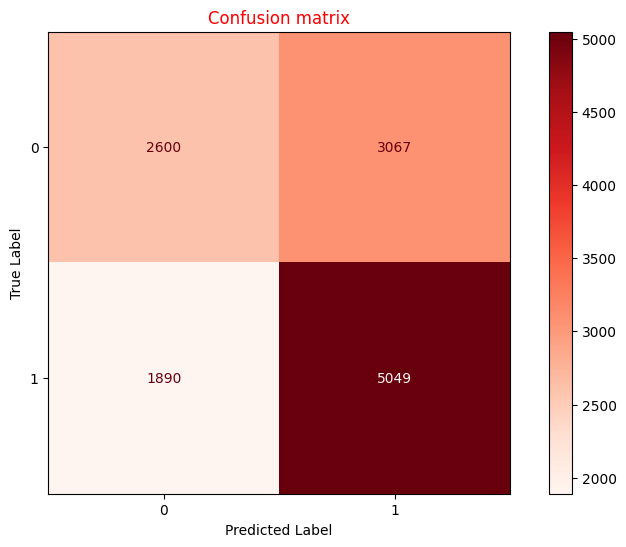

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

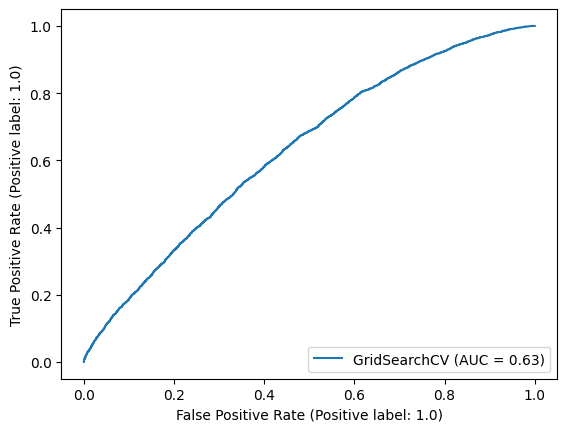

In [18]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Support Vector Machine

In [19]:
model = load("../models/svm.joblib")
test_data = load("../data/test data/svm_test_data.joblib")

In [20]:
label_predictions = model.predict(test_data["features"])

Classification report

In [21]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.62      0.37      0.46      5667
         1.0       0.61      0.81      0.70      6939

    accuracy                           0.61     12606
   macro avg       0.61      0.59      0.58     12606
weighted avg       0.61      0.61      0.59     12606



Matthews correlation coeficient

In [22]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.20445300515822878

Confusion matrix

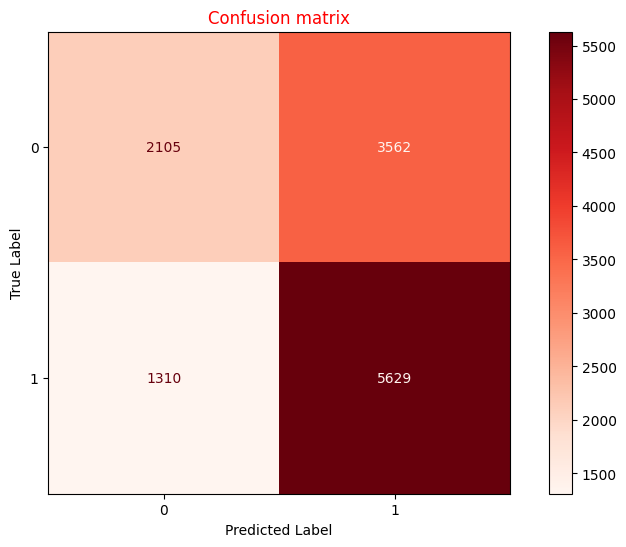

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

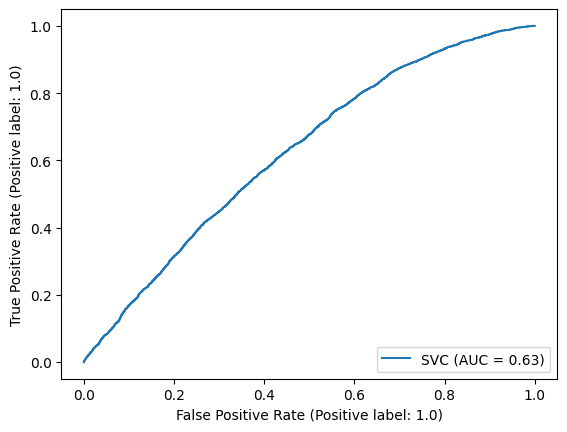

In [24]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Feedforward Neural Network with ReLu Activation

In [55]:
model = keras.models.load_model("../models/NNRelu")
test_data = load("../data/test data/nnrelu_test_data.joblib")

In [56]:
label_predictions = model.predict(test_data["features"])
label_predictions[label_predictions < 0.5] = 0
label_predictions[label_predictions >= 0.5] = 1

197/197 [==============================] - 0s 1ms/step


Classification report

In [57]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.47      0.95      0.62      2829
         1.0       0.73      0.11      0.20      3474

    accuracy                           0.49      6303
   macro avg       0.60      0.53      0.41      6303
weighted avg       0.61      0.49      0.39      6303



Matthews correlation coeficient

In [58]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.10851892021554868

Confusion matrix

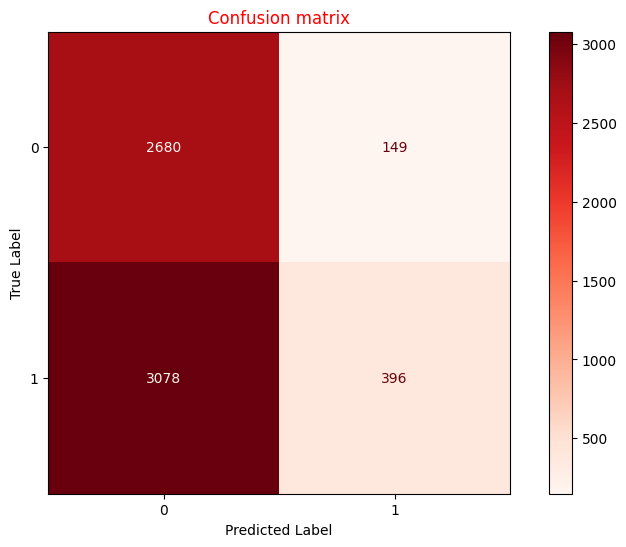

In [59]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

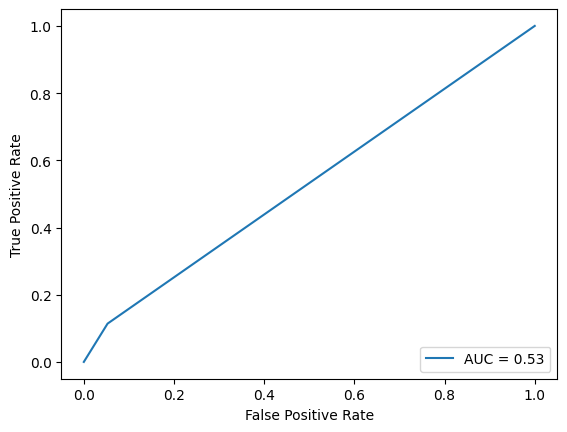

In [60]:
fpr, tpr, tresholds = roc_curve(test_data["labels"], label_predictions)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(test_data["labels"], label_predictions))
disp.plot();

## Feedforward Neural Network with Sigmoid Activation

In [61]:
model = keras.models.load_model("../models/NNSigmoid")
test_data = load("../data/test data/nnsigmoid_test_data.joblib")

In [62]:
label_predictions = model.predict(test_data["features"])
label_predictions[label_predictions < 0.5] = 0
label_predictions[label_predictions >= 0.5] = 1

197/197 [==============================] - 0s 1ms/step


Classification report

In [63]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.55      0.51      0.53      2829
         1.0       0.62      0.67      0.65      3474

    accuracy                           0.60      6303
   macro avg       0.59      0.59      0.59      6303
weighted avg       0.59      0.60      0.59      6303



Matthews correlation coeficient

In [64]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.17638478448799996

Confusion matrix

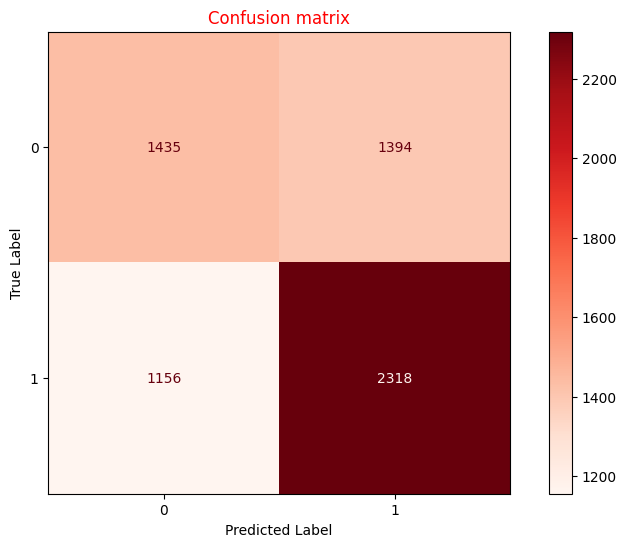

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

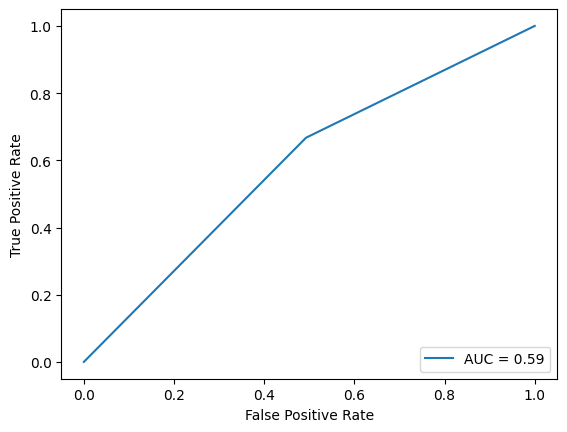

In [66]:
fpr, tpr, tresholds = roc_curve(test_data["labels"], label_predictions)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(test_data["labels"], label_predictions))
disp.plot();

## Multinomial Naive Bayes

In [37]:
model = load("../models/multinomialnb.joblib")
test_data = load("../data/test data/multinomialnb_test_data.joblib")

In [38]:
label_predictions = model.predict(test_data["features"])

Classification report

In [39]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5667
         1.0       0.55      1.00      0.71      6939

    accuracy                           0.55     12606
   macro avg       0.28      0.50      0.36     12606
weighted avg       0.30      0.55      0.39     12606



Matthews correlation coeficient

In [40]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.0

Confusion matrix

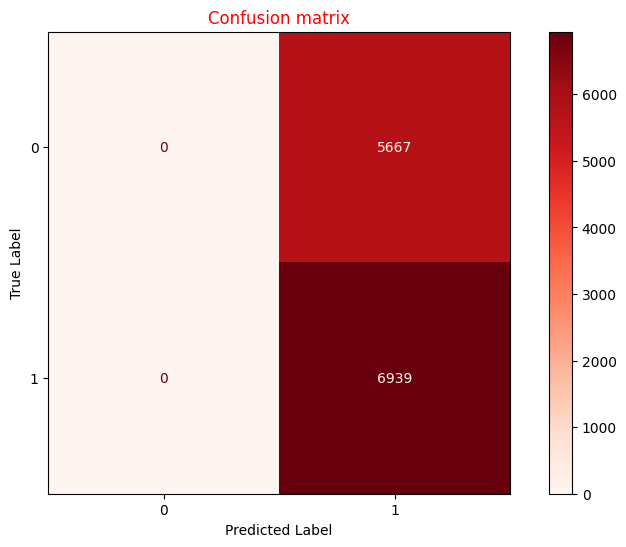

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

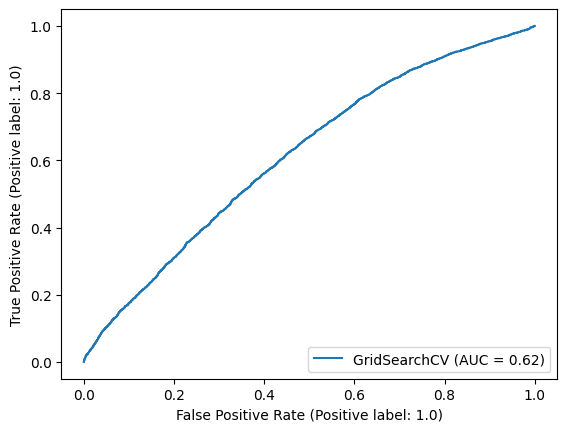

In [42]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Random Forest

In [43]:
model = load("../models/randomforest.joblib")
test_data = load("../data/test data/randomforest_test_data.joblib")

In [44]:
label_predictions = model.predict(test_data["features"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


Classification report

In [45]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.64      0.32      0.43      5667
           1       0.61      0.85      0.71      6939

    accuracy                           0.62     12606
   macro avg       0.63      0.59      0.57     12606
weighted avg       0.62      0.62      0.58     12606



Matthews correlation coeficient

In [46]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.21147739697301984

Confusion matrix

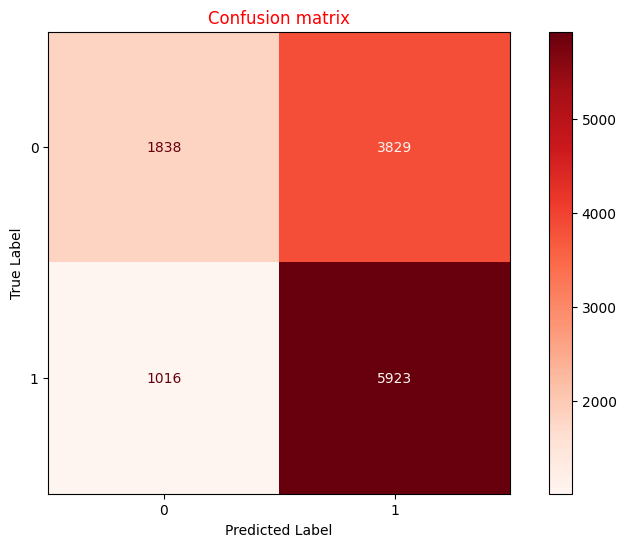

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


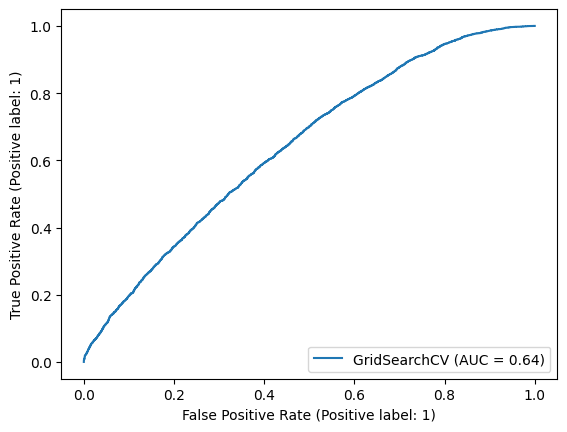

In [48]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## XGBoost

In [49]:
model = load("../models/xgboost.joblib")
test_data = load("../data/test data/xgboost_test_data.joblib")

In [50]:
label_predictions = model.predict(test_data["features"])

Classification report

In [51]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.68      0.26      0.38      5667
           1       0.60      0.90      0.72      6939

    accuracy                           0.61     12606
   macro avg       0.64      0.58      0.55     12606
weighted avg       0.63      0.61      0.57     12606



Matthews correlation coeficient

In [52]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.20977757481304676

Confusion matrix

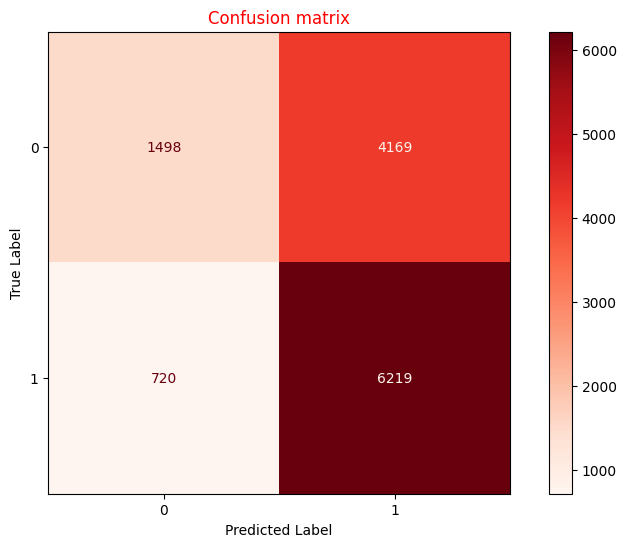

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

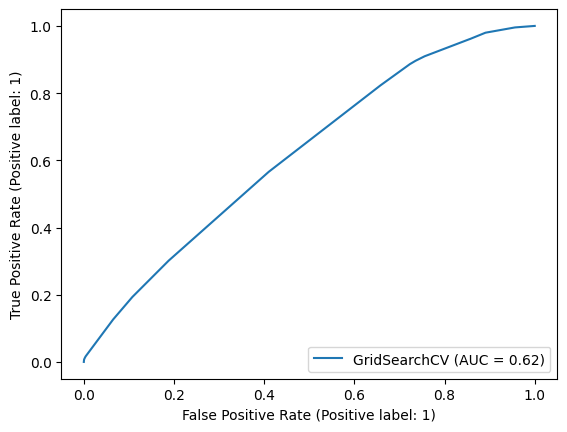

In [54]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## SGD Classifier - Logistic Regression

In [8]:
model = load("../models/sgdlogreg.joblib")
test_data = load("../data/test data/sgdlogreg_test_data.joblib")

In [9]:
label_predictions = model.predict(test_data["features"])

Classification report

In [10]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.58      0.45      0.51      5667
         1.0       0.62      0.73      0.67      6939

    accuracy                           0.61     12606
   macro avg       0.60      0.59      0.59     12606
weighted avg       0.60      0.61      0.60     12606



Matthews correlation coeficient

In [11]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.1907087917775219

Confusion matrix

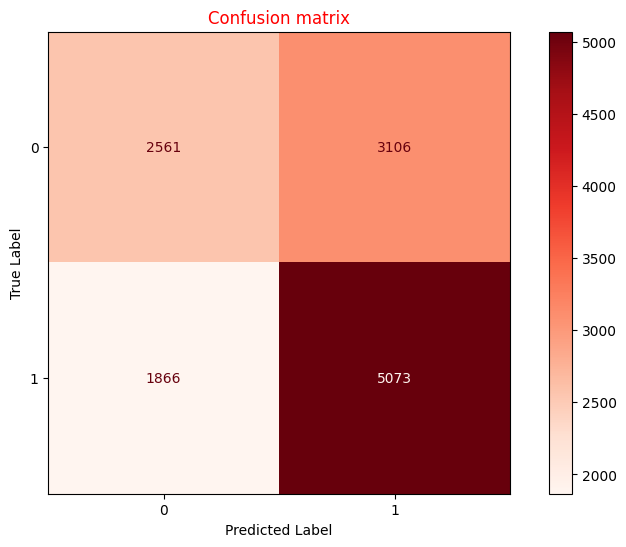

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

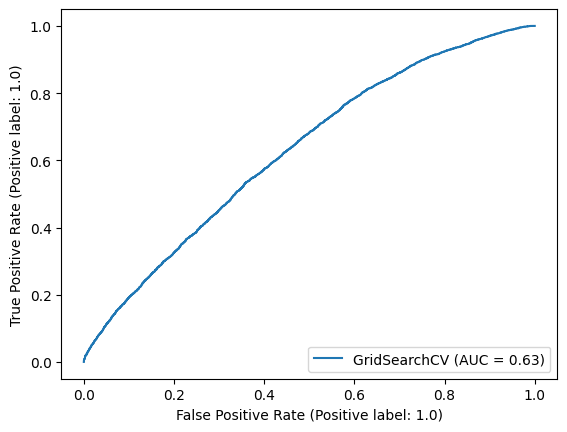

In [13]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## LightGBM

In [21]:
model = load("../models/lightgbm.joblib")
test_data = load("../data/test data/lightgbm_test_data.joblib")

In [22]:
label_predictions = model.predict(test_data["features"])

Classification report

In [23]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5667
           1       0.55      1.00      0.71      6939

    accuracy                           0.55     12606
   macro avg       0.28      0.50      0.36     12606
weighted avg       0.30      0.55      0.39     12606



Matthews correlation coeficient

In [24]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.0

Confusion matrix

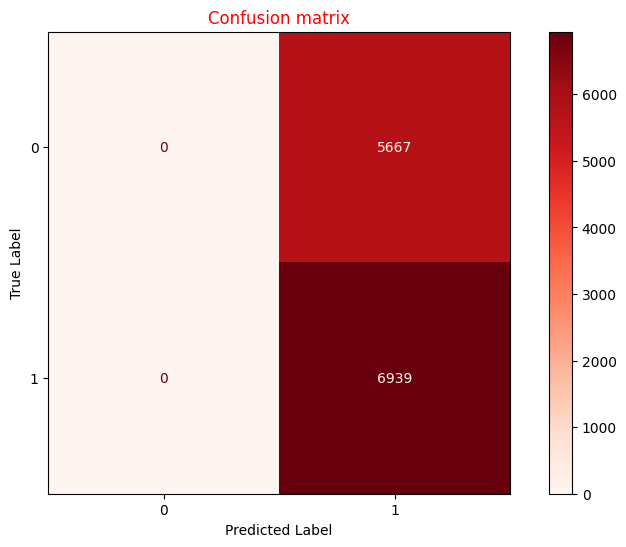

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

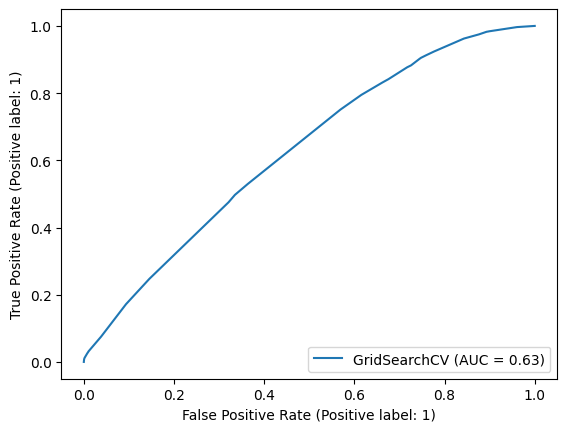

In [26]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Voting Classifier (Soft)
Estimators: Random Forest, XGBoost, Logistic Regression

In [28]:
model = load("../models/votingclf_soft.joblib")
test_data = load("../data/test data/votingclf_test_data.joblib")

In [29]:
label_predictions = model.predict(test_data["features"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Classification report

In [30]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.61      0.38      0.47      5667
         1.0       0.61      0.80      0.70      6939

    accuracy                           0.61     12606
   macro avg       0.61      0.59      0.58     12606
weighted avg       0.61      0.61      0.60     12606



Matthews correlation coeficient

In [31]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.20584875611943868

Confusion matrix

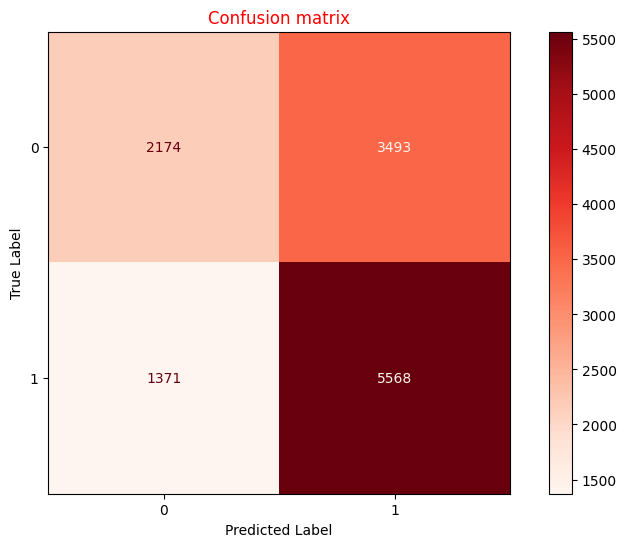

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


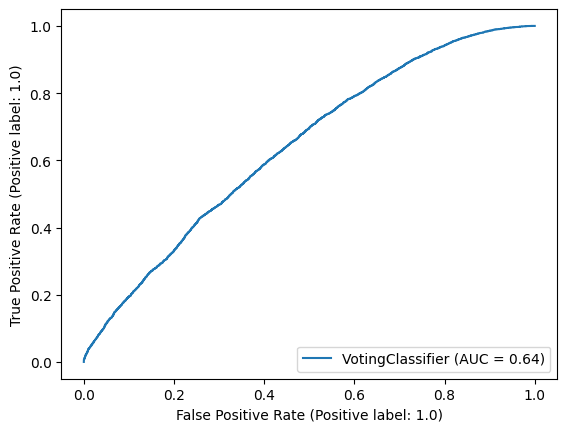

In [33]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Voting Classifier (Hard)
Estimators: Random Forest, XGBoost, Logistic Regression

In [34]:
model = load("../models/votingclf_hard.joblib")
test_data = load("../data/test data/votingclf_test_data.joblib")

In [35]:
label_predictions = model.predict(test_data["features"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Classification report

In [37]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.65      0.32      0.43      5667
         1.0       0.61      0.86      0.71      6939

    accuracy                           0.62     12606
   macro avg       0.63      0.59      0.57     12606
weighted avg       0.63      0.62      0.59     12606



Matthews correlation coeficient

In [38]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.2134849355696189

Confusion matrix

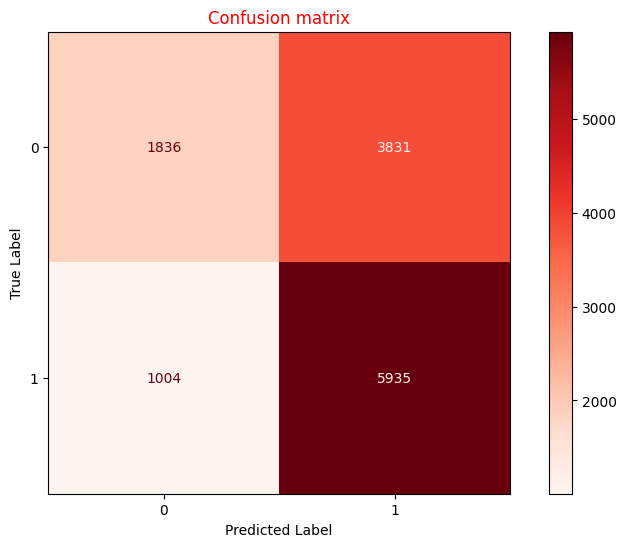

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)